In [37]:
import pandas as pd
import numpy as np

def standardize_names(name):
    return name.lower().replace(' ', '-')

results = pd.read_csv('../data/final_results__nn-all.csv')
results['nn_pred_api'] = results['nn_pred_api'].apply(standardize_names)

check sample_names: actual_class == nn_pred_api?

In [38]:
pred_api_names = set(results.nn_pred_api.unique())
actual_class_names = set(results.actual_class.unique())

common_names = pred_api_names.intersection(actual_class_names)
unique_to_pred_api = pred_api_names.difference(actual_class_names)
unique_to_actual_class = actual_class_names.difference(pred_api_names)

print("Common names:", common_names)
print("Unique to nn_pred_api:", unique_to_pred_api)
print("Unique to actual_class:", unique_to_actual_class)

Common names: {'ripe', 'hydroxychloroquine', 'benzyl-penicillin', 'rifampicin', 'pyrazinamide', 'azithromycin', 'albendazole', 'epinephrine', 'chloroquine', 'ampicillin', 'ferrous-sulfate', 'lactose', 'tetracycline', 'ceftriaxone', 'isoniazid', 'amoxicillin', 'promethazine-hydrochloride', 'ethambutol', 'ciprofloxacin', 'doxycycline', 'sulfamethoxazole'}
Unique to nn_pred_api: set()
Unique to actual_class: set()


In [39]:
results


,id,sample_id,actual_class,actual_quantity,nn_pred_quantity,nn_pred_prob,nn_pred_energy,nn_pred_api,nn_pred_api_prob,nn_pred_api_energy
0,15229,53848,amoxicillin,100,100,0.993513,-4.268341,amoxicillin,0.999902,16.626171
1,15233,53697,amoxicillin,100,100,0.999912,-1.493712,amoxicillin,0.999782,15.910532
2,15236,53703,amoxicillin,100,100,0.997775,-1.615417,amoxicillin,0.996856,14.064292
3,15238,53703,amoxicillin,100,100,0.998222,-2.102292,amoxicillin,0.998504,14.516852
4,15253,53712,amoxicillin,80,80,0.875029,-6.462397,amoxicillin,0.999843,16.759930
...,...,...,...,...,...,...,...,...,...,...
1995,25637,55075,ripe,50,50,0.954011,-4.103797,ripe,0.999938,17.090887
1996,25638,55492,ripe,20,20,0.998588,-1.996377,ripe,0.999939,16.960602
1997,25642,55075,ripe,50,50,0.994402,-3.224622,ripe,0.999926,16.857420
1998,25646,55432,ripe,80,100,0.524335,-6.212135,ripe,0.999932,17.129230


In [40]:
# Calculate the accuracy of the predictions
accuracy = (results['actual_class'] == results['nn_pred_api']).mean()
print(f"Accuracy of nn_pred_api: {accuracy:.2%}")

Accuracy of nn_pred_api: 99.45%


In [41]:
class_accuracy = results.groupby('actual_class').apply(lambda x: (x['actual_class'] == x['nn_pred_api']).mean())
print(class_accuracy)

actual_class
albendazole                   0.971014
amoxicillin                   0.990654
ampicillin                    1.000000
azithromycin                  1.000000
benzyl-penicillin             1.000000
ceftriaxone                   1.000000
chloroquine                   0.991453
ciprofloxacin                 1.000000
doxycycline                   1.000000
epinephrine                   1.000000
ethambutol                    1.000000
ferrous-sulfate               1.000000
hydroxychloroquine            1.000000
isoniazid                     1.000000
lactose                       1.000000
promethazine-hydrochloride    0.947917
pyrazinamide                  1.000000
rifampicin                    1.000000
ripe                          1.000000
sulfamethoxazole              0.980583
tetracycline                  1.000000
dtype: float64


/tmp/ipykernel_1209516/1999443358.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_accuracy = results.groupby('actual_class').apply(lambda x: (x['actual_class'] == x['nn_pred_api']).mean())


In [42]:
class_accuracy.to_csv('../data/nn_api_class_accuracy.csv', header=True)

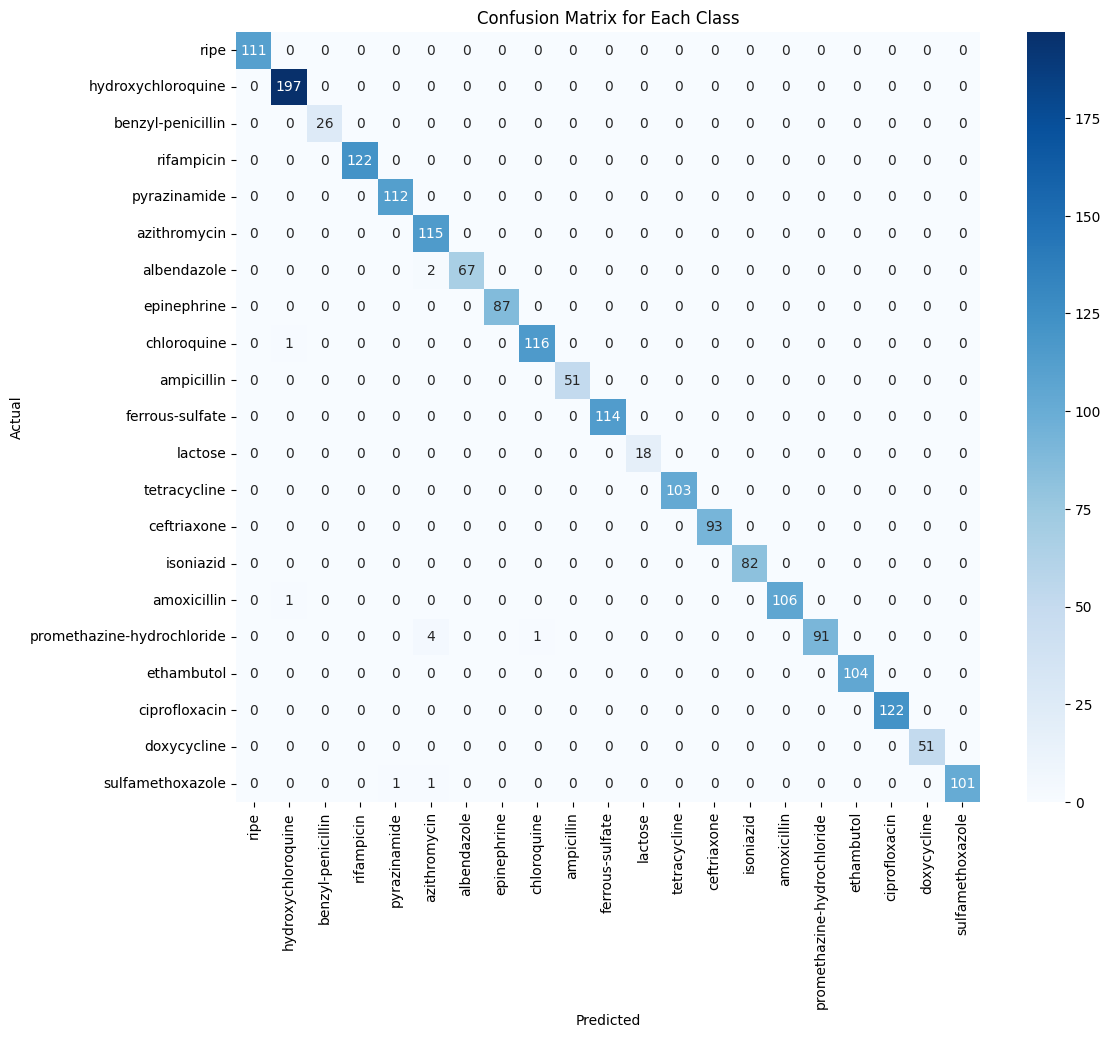

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(results['actual_class'], results['nn_pred_api'], labels=list(actual_class_names))

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=list(actual_class_names), columns=list(actual_class_names))

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Each Class')
plt.show()

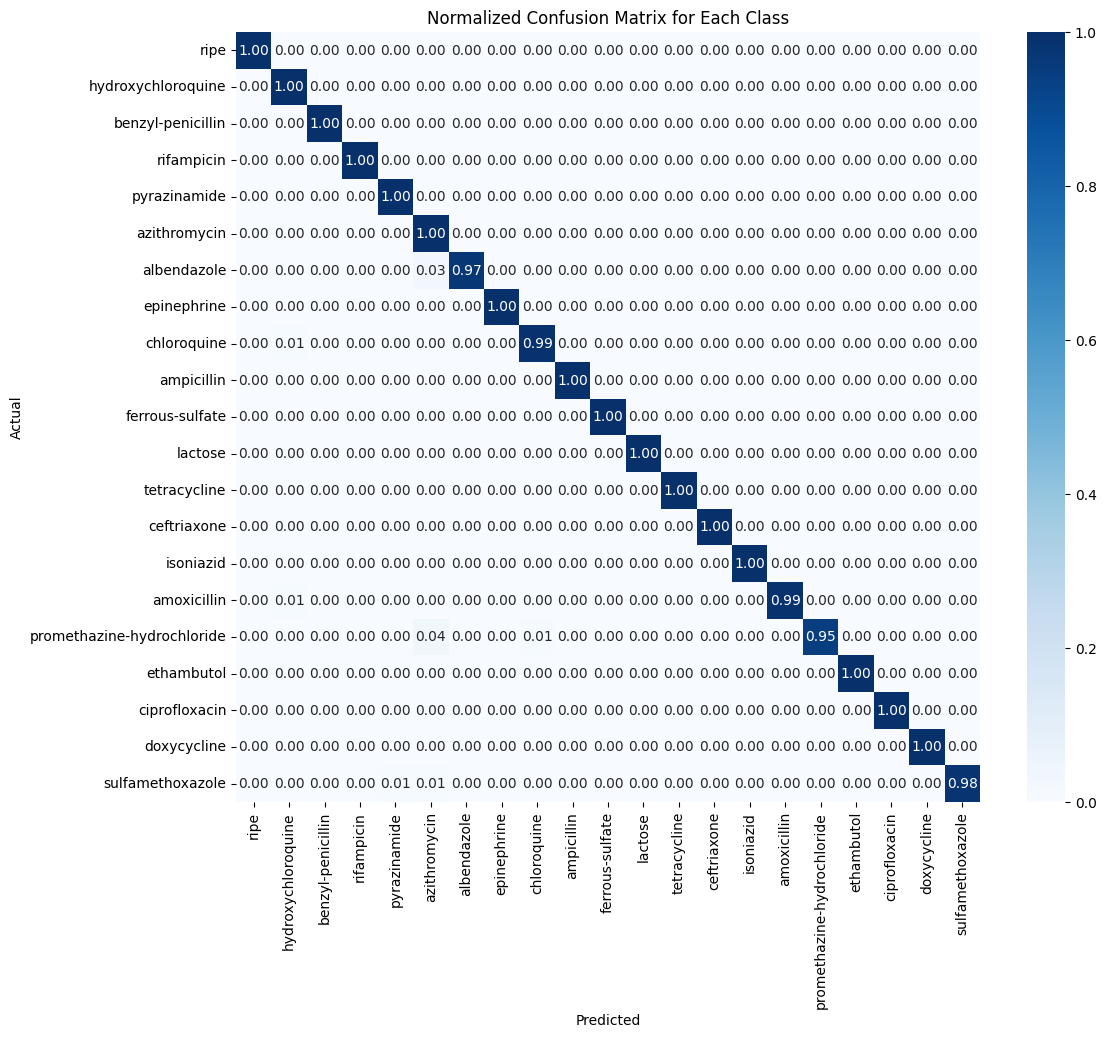

In [44]:


# Normalize the confusion matrix by class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame for better visualization
cm_normalized_df = pd.DataFrame(cm_normalized, index=list(actual_class_names), columns=list(actual_class_names))

# Plot the normalized confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized_df, annot=True, fmt='.2f', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix for Each Class')
plt.show()

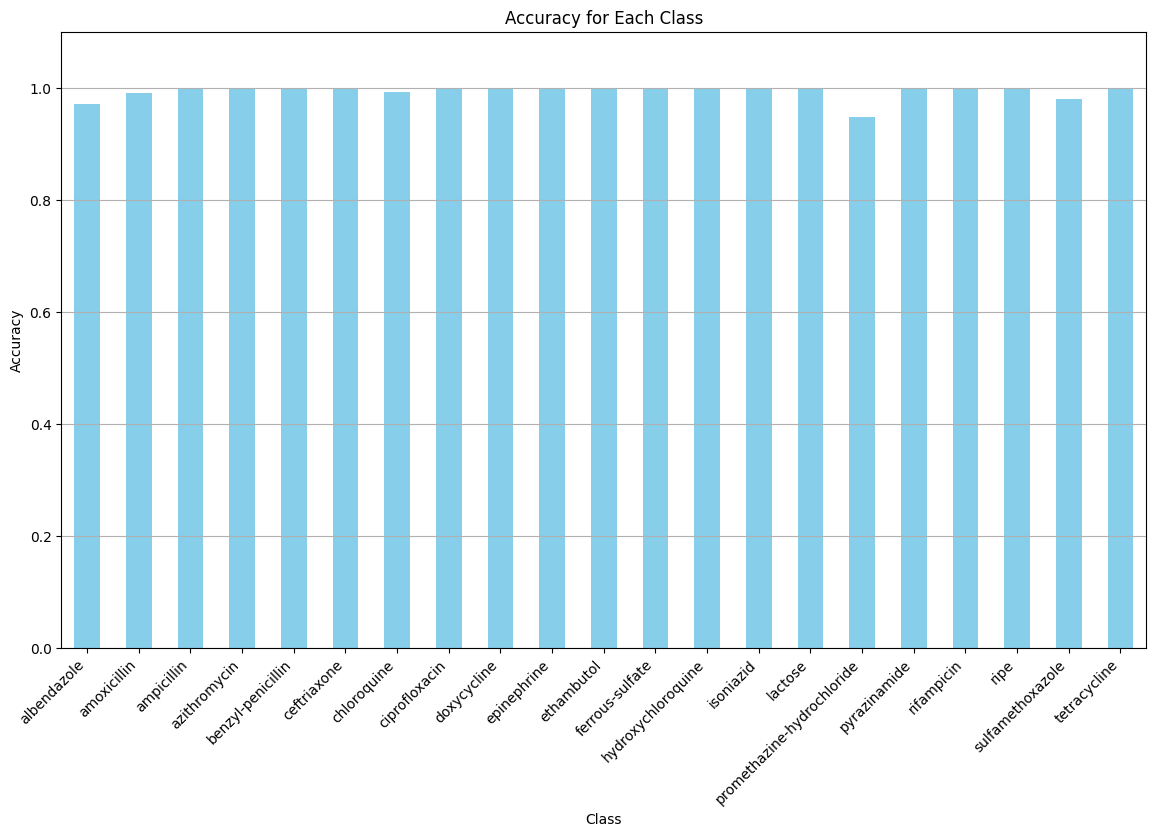

In [45]:
# Plot the accuracy for each class
plt.figure(figsize=(14, 8))
class_accuracy.plot(kind='bar', color='skyblue')
plt.ylabel('Accuracy')
plt.xlabel('Class')
plt.title('Accuracy for Each Class')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.show()

In [55]:
# Exclude 'lactose' from the RMSE calculation
filtered_results = results[results['actual_class'] != 'lactose']

# Calculate the RMSE between actual_quantity and pred_quantity for the filtered data
rmse_filtered = np.sqrt(mean_squared_error(filtered_results['actual_quantity'].astype(int), filtered_results['nn_pred_quantity'].astype(int)))

# Print the RMSE for the filtered data
print(f"RMSE (excluding 'lactose'): {rmse_filtered}")

RMSE (excluding 'lactose'): 18.335091497508213


In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(results['nn_pred_quantity'], results['actual_quantity']))
print(f"RMSE: {rmse:.2f}")

RMSE: 18.25


In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE by class
rmse_by_class = results.groupby('actual_class').apply(lambda x: np.sqrt(mean_squared_error(x['actual_quantity'], x['nn_pred_quantity'])))
print(rmse_by_class)

actual_class
albendazole                   22.425400
amoxicillin                   24.513967
ampicillin                    20.340243
azithromycin                  22.534997
benzyl-penicillin             30.884400
ceftriaxone                   23.279508
chloroquine                   16.794382
ciprofloxacin                 20.901800
doxycycline                   24.614678
epinephrine                   15.161961
ethambutol                    17.458743
ferrous-sulfate                9.412571
hydroxychloroquine            12.725130
isoniazid                     15.578284
lactose                        0.000000
promethazine-hydrochloride    16.361795
pyrazinamide                  16.982133
rifampicin                    19.585876
ripe                          12.043465
sulfamethoxazole              14.548212
tetracycline                  19.483625
dtype: float64


/tmp/ipykernel_1209516/1155246620.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_by_class = results.groupby('actual_class').apply(lambda x: np.sqrt(mean_squared_error(x['actual_quantity'], x['nn_pred_quantity'])))


In [53]:
rmse_by_class.to_csv('../data/nn_api_class_rmse.csv', header=True)